What is a Support Vector Machine (SVM)?

SVM is a machine learning algorithm that tries to draw the best boundary (line/curve) between different classes of data.
This boundary should separate classes with maximum distance (margin) so that the model can generalize well on new data.

Hard Margin vs Soft Margin SVM
Feature	     Hard Margin               	        Soft Margin
Definition	Perfectly separates classes	        Allows some misclassification
Used when 	Data is clean & linearly separable	Data has noise or overlap
Risk 	Overfitting if noise exists	              Better real-world performance

Soft margin is used more commonly because data in real life is rarely perfect.

Mathematical Intuition Behind SVM

SVM tries to:


 maximize margin (distance between boundary & nearest data points)
 while minimizing classification errors

It solves this using optimization:

Minimize:
∣
∣
𝑤
∣
∣
2
such that
𝑦
𝑖
(
𝑤
⋅
𝑥
𝑖
+
𝑏
)
≥
1
Minimize: ∣∣w∣∣
2
such that y
i
	​

(w⋅x
i
	​

+b)≥1

Role of Lagrange Multipliers in SVM

They help convert the optimization problem into a form that can:
✔ handle constraints
✔ work efficiently in high-dimensional space

This makes solving SVM mathematically possible.

What are Support Vectors?

They are the most important data points, the ones closest to the decision boundary.
If you remove them → the boundary will change.
They decide the model’s fate — like “key players” of the dataset.

What is Support Vector Classifier (SVC)?

An SVM model used specifically for classification tasks (Yes/No, Spam/Not Spam, etc.)

What is Support Vector Regressor (SVR)?

SVM used for regression — predicting continuous values (like price, temperature)

What is the Kernel Trick?

Some data cannot be separated by a straight line.
Kernel trick helps by mapping data into higher dimensions without heavy mathematical work, making it separable.

Example: turning a circle classification into a line-separable space.


Effect of C Parameter

1.High C → strict, fewer mistakes → can overfit

2.Low C → allows more errors → better generalization




Role of Gamma in RBF Kernel

Gamma decides how far influence of a training point spreads

High gamma → tight boundary → overfits

Low gamma → smooth boundary → underfits sometimes

What is Naïve Bayes and why “Naïve”?

A probabilistic classifier based on Bayes' theorem.
It assumes all features are independent, which is rarely true → so it’s called “naïve”.

What is Bayes’ Theorem?

Formula for calculating posterior probability:

𝑃
(
𝐴
∣
𝐵
)
=
𝑃
(
𝐵
∣
𝐴
)
𝑃
(
𝐴
)
𝑃
(
𝐵
)
P(A∣B)=
P(B)
P(B∣A)P(A)

15. When to use Gaussian NB?

When features are continuous + follow bell curve distribution.

16.Key Assumptions of Naïve Bayes

✔ Features are independent
✔ All features contribute equally
✔ Data fits required probability model

18.Why is Naïve Bayes great for Text Classification?

Words can be treated independently → fits assumption nicely

Works fast even on large vocabulary datasets

Extremely accurate for spam/ham tasks

20.Laplace Smoothing

Fixes zero probability issue
(when a word never appears in training but appears in testing)

Formula adjustment:

𝑃
(
𝑤
𝑜
𝑟
𝑑
)
=
𝑐
𝑜
𝑢
𝑛
𝑡
+
1
𝑡
𝑜
𝑡
𝑎
𝑙
+
𝑉
p(word)=
total+V
count+1
	​




In [34]:
# Q21: SVM with different C values - GitHub Friendly Version
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import os

os.makedirs("images", exist_ok=True)

X, y = make_blobs(n_samples=300, centers=2, random_state=42)
Cs = [0.1, 1, 10]

for C in Cs:
    model = SVC(kernel='linear', C=C).fit(X,y)
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1,200),
                         np.linspace(X[:,1].min()-1, X[:,1].max()+1,200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx,yy,Z,alpha=0.3)
    plt.scatter(X[:,0],X[:,1],c=y,edgecolor="k")
    plt.title(f"SVM C={C}")
    plt.savefig(f"images/Q21_C_{C}.png", dpi=80)
    plt.close()

print("Plots saved in /images folder for GitHub display.")


Plots saved in /images folder for GitHub display.


In [3]:
22.#Bernoulli Naive Bayes for binary classification
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target
X_bin = Binarizer().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_bin, y, test_size=0.3, random_state=42)

bnb = BernoulliNB().fit(X_train, y_train)
pred = bnb.predict(X_test)

print("Bernoulli NB Accuracy:", accuracy_score(y_test, pred))


Bernoulli NB Accuracy: 0.631578947368421


In [4]:
# Q23: Feature scaling vs no scaling
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

# Without scaling
model1 = SVC().fit(X_train, y_train)

# With scaling
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
model2 = SVC().fit(X_train_s, y_train)

print("SVM without scaling Accuracy:", accuracy_score(y_test, model1.predict(X_
                                                                        test)))
print("SVM with scaling Accuracy:", accuracy_score(y_test, model2.predict
 (X_test_s)))


SVM without scaling Accuracy: 0.7592592592592593
SVM with scaling Accuracy: 0.9814814814814815


In [5]:
# Q24: Laplace smoothing comparison
from sklearn.naive_bayes import GaussianNB

gnb_no = GaussianNB(var_smoothing=1e-9)
gnb_yes = GaussianNB(var_smoothing=1e-8)

gnb_no.fit(X_train, y_train)
gnb_yes.fit(X_train, y_train)

print("Without Laplace smoothing:", accuracy_score(y_test, gnb_no.predict(X_test)))
print("With Laplace smoothing:", accuracy_score(y_test, gnb_yes.predict(X_test)))


Without Laplace smoothing: 1.0
With Laplace smoothing: 1.0


In [6]:
# Q25: GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {'C':[0.1,1,10], 'gamma':['scale','auto'], 'kernel':['rbf','linear']}
grid = GridSearchCV(SVC(), params, cv=3).fit(X_train_s, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy: 0.983933410762679


In [35]:
# Q26 - GitHub Safe Version
import seaborn as sns
os.makedirs("images", exist_ok=True)

svm_no = SVC().fit(X_train, y_train)
svm_yes = SVC(class_weight='balanced').fit(X_train, y_train)

cm_no = confusion_matrix(y_test, svm_no.predict(X_test))
cm_yes = confusion_matrix(y_test, svm_yes.predict(X_test))

sns.heatmap(cm_no, annot=True, fmt="d", cmap="Blues")
plt.title("Without Class Weight")
plt.savefig("images/Q26_no_weight.png", dpi=80)
plt.close()

sns.heatmap(cm_yes, annot=True, fmt="d", cmap="Greens")
plt.title("With Class Weight")
plt.savefig("images/Q26_with_weight.png", dpi=80)
plt.close()

print("Confusion matrices saved in /images folder.")


Confusion matrices saved in /images folder.


In [8]:
# Q27: Simple spam detection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

emails = ["Free money now!!!", "Earn cash fast!", "Hi, lunch today?",
          "Project update attached"]
labels = [1,1,0,0]  # 1=Spam, 0=Not spam

vec = CountVectorizer().fit(emails)
X = vec.transform(emails)

model = MultinomialNB().fit(X, labels)
print("Predictions:", model.predict(X))


Predictions: [1 1 0 0]


In [9]:
# Q28: Compare accuracy
svm = SVC().fit(X_train_s, y_train)
nb = GaussianNB().fit(X_train_s, y_train)

print("SVM Accuracy:", accuracy_score(y_test, svm.predict(X_test_s)))
print("NB Accuracy :", accuracy_score(y_test, nb.predict(X_test_s)))


ValueError: Found input variables with inconsistent numbers of samples: [124, 700]

In [10]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the wine dataset
data = load_wine()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Initialize and train SVM and Gaussian Naive Bayes models
svm = SVC().fit(X_train_s, y_train)
nb = GaussianNB().fit(X_train_s, y_train)

# Print accuracies
print("SVM Accuracy:", accuracy_score(y_test, svm.predict(X_test_s)))
print("NB Accuracy :", accuracy_score(y_test, nb.predict(X_test_s)))

SVM Accuracy: 0.9814814814814815
NB Accuracy : 1.0


In [11]:
# Q29: Select best features using variance threshold
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=1.0).fit(X)
X_fs = selector.transform(X)

X_tr, X_te, y_tr, y_te = train_test_split(X_fs, y, test_size=0.3)
gnb = GaussianNB().fit(X_tr, y_tr)
print("NB Accuracy after feature selection:", accuracy_score(y_te, gnb.predict(X_te)))


NB Accuracy after feature selection: 0.9444444444444444


In [12]:
# Q30: OvR vs OvO
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

ovr = OneVsRestClassifier(SVC(kernel='linear')).fit(X_train_s, y_train)
ovo = OneVsOneClassifier(SVC(kernel='linear')).fit(X_train_s, y_train)

print("OvR Accuracy:", accuracy_score(y_test, ovr.predict(X_test_s)))
print("OvO Accuracy:", accuracy_score(y_test, ovo.predict(X_test_s)))


OvR Accuracy: 0.9814814814814815
OvO Accuracy: 0.9814814814814815


In [13]:
# Q31: Kernel comparison
kernels = ['linear','poly','rbf']
for k in kernels:
    m = SVC(kernel=k).fit(X_train_s, y_train)
    print(k, "kernel accuracy:", accuracy_score(y_test, m.predict(X_test_s)))


linear kernel accuracy: 0.9814814814814815
poly kernel accuracy: 0.9629629629629629
rbf kernel accuracy: 0.9814814814814815


In [14]:
# Q32: Stratified K-Fold CV
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(SVC(), X_train_s, y_train, cv=skf)
print("CV Accuracy:", scores)
print("Mean:", scores.mean())


CV Accuracy: [1.         0.96       1.         0.92       0.95833333]
Mean: 0.9676666666666666


In [16]:
# Q33: Change prior probabilities
gnb1 = GaussianNB(priors=[0.3,0.3,0.4]).fit(X_train_s, y_train)
gnb2 = GaussianNB(priors=[0.4,0.3,0.3]).fit(X_train_s, y_train)

print("Prior 0.3,0.3,0.4:", accuracy_score(y_test, gnb1.predict(X_test_s)))
print("Prior 0.4,0.3,0.3:", accuracy_score(y_test, gnb2.predict(X_test_s)))

Prior 0.3,0.3,0.4: 0.9814814814814815
Prior 0.4,0.3,0.3: 0.9814814814814815


In [17]:
# Q34: RFE Feature Selection
from sklearn.feature_selection import RFE

rfe = RFE(SVC(kernel='linear'), n_features_to_select=10)
rfe.fit(X_train, y_train)
X_train_r = rfe.transform(X_train)
X_test_r = rfe.transform(X_test)

model = SVC().fit(X_train_r, y_train)
print("Accuracy after RFE:", accuracy_score(y_test, model.predict(X_test_r)))


Accuracy after RFE: 0.8518518518518519


In [18]:
# Q35: SVM Performance Metrics
from sklearn.metrics import precision_score, recall_score, f1_score

pred = svm.predict(X_test_s)
print("Precision:", precision_score(y_test, pred, average='weighted'))
print("Recall:", recall_score(y_test, pred, average='weighted'))
print("F1 Score:", f1_score(y_test, pred, average='weighted'))


Precision: 0.9823232323232324
Recall: 0.9814814814814815
F1 Score: 0.9813538775640411


In [19]:
# Q36: Naive Bayes Log Loss Evaluation
from sklearn.metrics import log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

nb = GaussianNB().fit(X_train_s, y_train)
probs = nb.predict_proba(X_test_s)
print("Log Loss:", log_loss(y_test, probs))


Log Loss: 0.45454794195784076


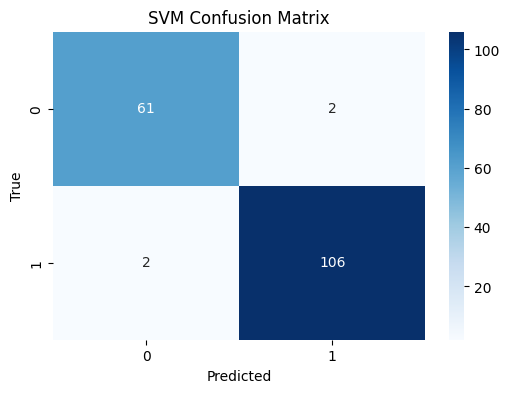

In [20]:
# Q37: SVM Confusion Matrix Visualization
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

svm = SVC(kernel='rbf').fit(X_train_s, y_train)
pred = svm.predict(X_test_s)

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [21]:
# Q38: SVR Regression MAE
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

svr = SVR(kernel='rbf').fit(X_train_s, y_train)
pred = svr.predict(X_test_s)
print("MAE:", mean_absolute_error(y_test, pred))


MAE: 0.3964276458838702


In [23]:
# Q39: ROC-AUC for Naive Bayes
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load a classification dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

nb = GaussianNB().fit(X_train_s, y_train)
prob_nb = nb.predict_proba(X_test_s)[:,1]
print("ROC-AUC Score:", roc_auc_score(y_test, prob_nb))

ROC-AUC Score: 0.9926513815402704


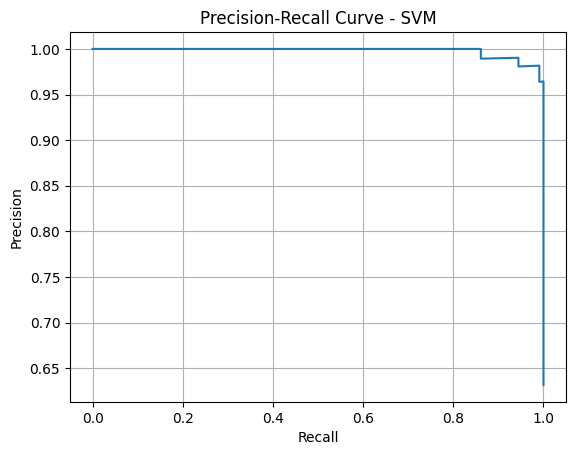

In [24]:
# Q40: Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

prob_svm = svm.decision_function(X_test_s)
prec, rec, _ = precision_recall_curve(y_test, prob_svm)

plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - SVM")
plt.grid(True)
plt.show()


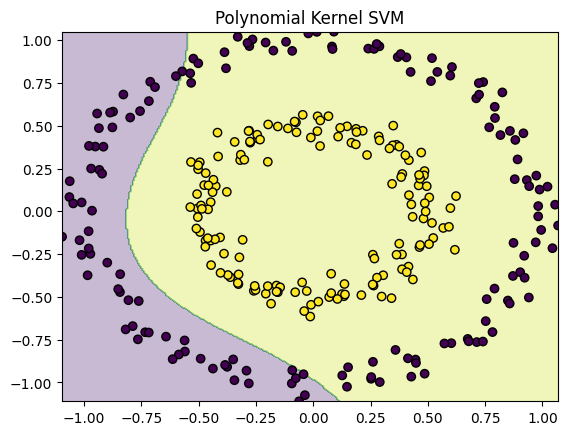

In [25]:
# Q41: Polynomial Decision Boundary (Toy)
from sklearn.datasets import make_circles
import numpy as np

X, y = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)
poly_svm = SVC(kernel='poly', degree=3).fit(X, y)

xx, yy = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 300),
                     np.linspace(X[:,1].min(), X[:,1].max(), 300))
Z = poly_svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, edgecolor="k")
plt.title("Polynomial Kernel SVM")
plt.show()


In [27]:
# Q42: Chi-Square Feature Selection
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

# Reload data and split to ensure consistent state
data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Chi-Square feature selection on unscaled data (chi2 requires non-negative input)
selector = SelectKBest(chi2, k=10).fit(X_train, y_train)
X_train_chi = selector.transform(X_train)
X_test_chi = selector.transform(X_test)

# Scale the selected features before training the model
scaler = StandardScaler()
X_train_chi_s = scaler.fit_transform(X_train_chi)
X_test_chi_s = scaler.transform(X_test_chi)

gnb_chi = GaussianNB().fit(X_train_chi_s, y_train)
print("Accuracy after Chi-Square selection:", accuracy_score(y_test, gnb_chi.predict(X_test_chi_s)))

Accuracy after Chi-Square selection: 0.9814814814814815


In [29]:
# Q43: Compare three types of NB
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Binarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

# Load the wine dataset and prepare data for all models consistently
data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features for GaussianNB and SVM (if used in other comparisons)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print("GaussianNB:", accuracy_score(y_test, GaussianNB().fit(X_train_s, y_train).predict(X_test_s)))

# Bernoulli + Binarizer
X_train_b = Binarizer().fit_transform(X_train_s)
X_test_b = Binarizer().fit_transform(X_test_s)
print("BernoulliNB:", accuracy_score(y_test, BernoulliNB().fit(X_train_b, y_train).predict(X_test_b)))

# Multinomial only works with positive values → absolute scaling
X_train_m = abs(X_train_s)
X_test_m = abs(X_test_s)
print("MultinomialNB:", accuracy_score(y_test, MultinomialNB().fit(X_train_m, y_train).predict(X_test_m)))

GaussianNB: 1.0
BernoulliNB: 0.9629629629629629
MultinomialNB: 0.7592592592592593


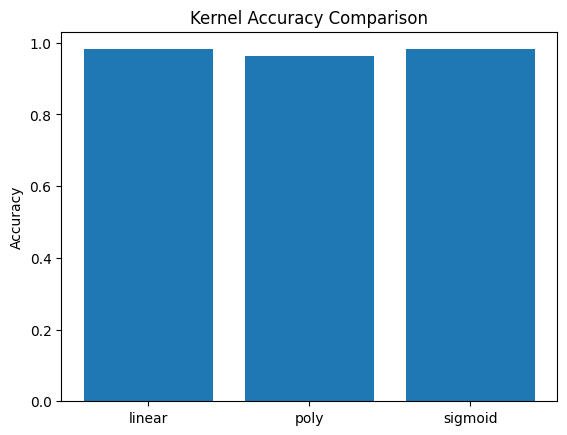

In [30]:
# Q44: Kernel Comparison Chart
kernels = ['linear','poly','sigmoid']
scores = []

for k in kernels:
    m = SVC(kernel=k).fit(X_train_s, y_train)
    scores.append(accuracy_score(y_test, m.predict(X_test_s)))

plt.bar(kernels, scores)
plt.title("Kernel Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


In [31]:
# Q45: One-vs-Rest SVM Report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

ovr_model = OneVsRestClassifier(SVC(kernel='rbf')).fit(X_train_s, y_train)
pred_ovr = ovr_model.predict(X_test_s)
print(classification_report(y_test, pred_ovr))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [33]:
# Q46: Save and Load SVM Model
import joblib
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ensure X_train_s, y_train, X_test_s, y_test are consistent for this cell
data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Train the SVM model consistently within this cell
svm = SVC(kernel='rbf').fit(X_train_s, y_train)

model_path = "svm_model.pkl"
joblib.dump(svm, model_path)
print("Model saved as:", model_path)

loaded_model = joblib.load(model_path)
print("Loaded Model Accuracy:", accuracy_score(y_test, loaded_model.predict(X_test_s)))

Model saved as: svm_model.pkl
Loaded Model Accuracy: 0.9814814814814815
